<a href="https://colab.research.google.com/github/Storm00212/SkyAcre/blob/main/Poultry_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving poultry_health_large_dataset.csv to poultry_health_large_dataset (3).csv


In [ ]:
import pandas as pd
import io

# Replace 'dairy_multi_disease_dataset.csv' with the exact filename if different
df = pd.read_csv(io.BytesIO(uploaded['poultry_health_large_dataset (3).csv']))
#seeing dataset structure
print("Dataset shape:", df.shape)
print("\nDisease label distribution:")
print(df['disease_label'].value_counts().sort_index())

print("\nFirst few rows:")# show dataset
df.head()#1st 5

Dataset shape: (72000, 9)

Disease label distribution:
disease_label
0    59511
1     6759
2     1449
3     1868
4     2413
Name: count, dtype: int64

First few rows:


,farm_id,day,flock_type,ambient_temp,feed_intake_g,water_intake_ml,mortality_rate,egg_production_rate,disease_label
0,1,1,layer,26.29,107.1,241.9,5.88,77.8,3
1,1,2,layer,23.83,112.1,191.7,0.00,77.4,0
2,1,3,layer,24.14,108.9,198.1,0.25,89.7,0
3,1,4,layer,25.24,112.3,191.1,0.24,69.0,0
4,1,5,layer,23.93,119.9,257.3,0.06,83.2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Features (clinically relevant ones - excluding farm_id, day, and flock_type for modeling)
# Updated features based on the available columns in the poultry dataset
features = ['ambient_temp', 'feed_intake_g', 'water_intake_ml', 'mortality_rate', 'egg_production_rate']


X = df[features]
y = df['disease_label']

# Handle class imbalance with class_weight='balanced'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
#training samples complete

Training samples: 57600
Test samples: 14400


In [ ]:
# Random Forest with balanced class weights (great for imbalanced farm data)
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',  # Helps with rare diseases
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)
# Accuracy evaluation.
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9988194444444445

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11902
           1       1.00      1.00      1.00      1352
           2       0.99      0.97      0.98       290
           3       0.98      0.99      0.99       374
           4       1.00      0.99      0.99       482

    accuracy                           1.00     14400
   macro avg       0.99      0.99      0.99     14400
weighted avg       1.00      1.00      1.00     14400



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# accuracy/confusion matrix


Confusion Matrix:
[[11902     0     0     0     0]
 [    0  1352     0     0     0]
 [    0     0   281     9     0]
 [    0     0     2   372     0]
 [    6     0     0     0   476]]


Feature Importance:
               feature  importance
3       mortality_rate    0.396898
1        feed_intake_g    0.251790
0         ambient_temp    0.224237
2      water_intake_ml    0.085519
4  egg_production_rate    0.041556


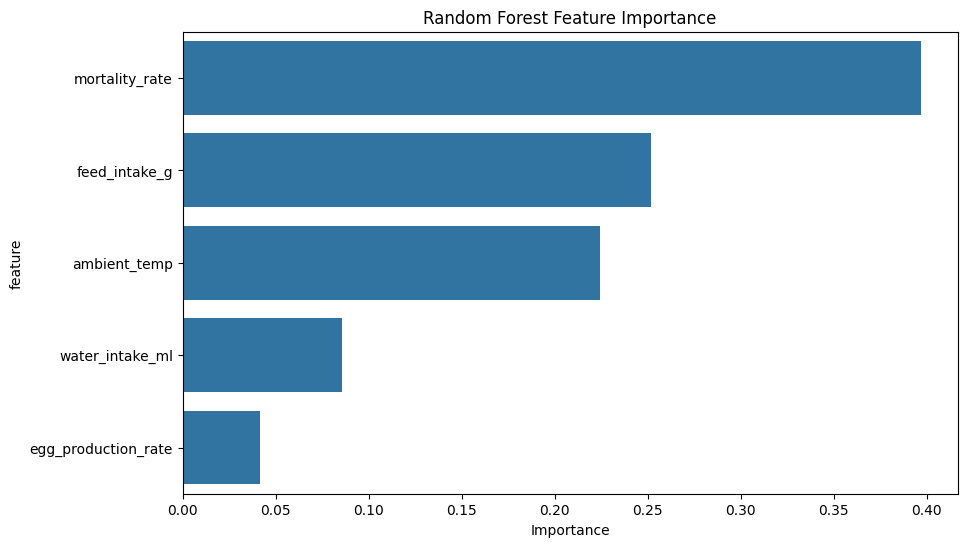

In [ ]:
# Show important features for selection
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_imp)

# Plot for features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_imp)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()
#will remove less important features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#

Mounted at /content/drive


In [ ]:
DATA_PATH = 'content/drive/MyDrive/Livestock ml model/Data'
MODEL_PATH = 'content/drive/MyDrive/Livestock ml model/Models'

In [ ]:
disease_map = {
    0: "Healthy",
    1: "Heat Stress",
    2: "Newcastle Disease",
    3: "Coccidiosis",
    4: "Nutritional Stress"
}


In [ ]:
import numpy as np

# Raw farmer input
# Original input: [ambient_temp, mortality_rate, feed_intake_g]
# Model expects: ['ambient_temp', 'feed_intake_g', 'water_intake_ml', 'mortality_rate', 'egg_production_rate']
# I will use placeholder values for 'water_intake_ml' and 'egg_production_rate'. Please update these with actual data.
user_input = [32, 70, 200, 6.5, 85]   # [ambient_temp, feed_intake_g, water_intake_ml, mortality_rate, egg_production_rate]

# Convert to numpy & reshape
user_input = np.array(user_input).reshape(1, -1)

# Predict disease
prediction = rf_model.predict(user_input)[0]

# Map numeric prediction to disease name
predicted_disease = disease_map[prediction]
# Added detailed descriptions for each disease
print(f"Predicted Poultry Condition: {predicted_disease}")
if predicted_disease == "Newcastle Disease":
    print("Reason: Sudden high mortality combined with a sharp drop in feed intake.")
    print("Action: Isolate the flock immediately, restrict movement, and contact a veterinary officer.")

elif predicted_disease == "Heat Stress":
    print("Reason: High ambient temperature causing reduced feed intake and increased water consumption.")
    print("Action: Improve ventilation, provide cool clean water, and reduce stocking density.")

elif predicted_disease == "Coccidiosis":
    print("Reason: Gradual increase in mortality with declining feed intake under normal temperature.")
    print("Action: Improve litter hygiene, reduce moisture, and consult a vet for coccidiostat treatment.")

elif predicted_disease == "Nutritional Stress":
    print("Reason: Low feed intake with minimal mortality leading to poor productivity.")
    print("Action: Review feed quality and quantity, and ensure adequate feeder access.")

else:
    print("Reason: Mortality, feed intake, and temperature are within normal ranges.")
    print("Action: Maintain current management practices and continue monitoring the flock.")





Predicted Poultry Condition: Newcastle Disease
Reason: Sudden high mortality combined with a sharp drop in feed intake.
Action: Isolate the flock immediately, restrict movement, and contact a veterinary officer.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
disease_map = {
    0: "Healthy",
    1: "Heat Stress",
    2: "Newcastle Disease",
    3: "Coccidiosis",
    4: "Nutritional Stress"
}

user_input = [32, 70, 200, 6.5, 85]   # [ambient_temp, feed_intake_g, water_intake_ml, mortality_rate, egg_production_rate]

# Convert to numpy & reshape
user_input = np.array(user_input).reshape(1, -1)
proba = rf_model.predict_proba(user_input)[0]
confidence = np.max(proba) * 100
print(f"Predicted Poultry Condition: {predicted_disease}")
print(f"Confidence: {confidence:.1f}%")
if predicted_disease == "Newcastle Disease":
    print("Reason: Sudden high mortality combined with a sharp drop in feed intake.")
    print("Action: Isolate the flock immediately, restrict movement, and contact a veterinary officer.")

elif predicted_disease == "Heat Stress":
    print("Reason: High ambient temperature causing reduced feed intake and increased water consumption.")
    print("Action: Improve ventilation, provide cool clean water, and reduce stocking density.")

elif predicted_disease == "Coccidiosis":
    print("Reason: Gradual increase in mortality with declining feed intake under normal temperature.")
    print("Action: Improve litter hygiene, reduce moisture, and consult a vet for coccidiostat treatment.")

elif predicted_disease == "Nutritional Stress":
    print("Reason: Low feed intake with minimal mortality leading to poor productivity.")
    print("Action: Review feed quality and quantity, and ensure adequate feeder access.")

else:
    print("Reason: Mortality, feed intake, and temperature are within normal ranges.")
    print("Action: Maintain current management practices and continue monitoring the flock.")


Predicted Poultry Condition: Newcastle Disease
Confidence: 54.0%
Reason: Sudden high mortality combined with a sharp drop in feed intake.
Action: Isolate the flock immediately, restrict movement, and contact a veterinary officer.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
